# Part I - Ford GoBike System Data
## by Mahmoud Adel

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as ms
%matplotlib inline

In [2]:
sb.set()

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
def report(Link:str):
    """
    Return Report About DataFrame
    
    Params : Link of DataSet
    
    Return : Return Report and a DataFrame
    """
    df=pd.read_csv(Link)
    ms.bar(df)
    plt.show()
    print(f"Number of Duplicates(df.duplicated().sum())")
    print(df.dtypes)
    print(df.describe())
    print(df.info())
    return df

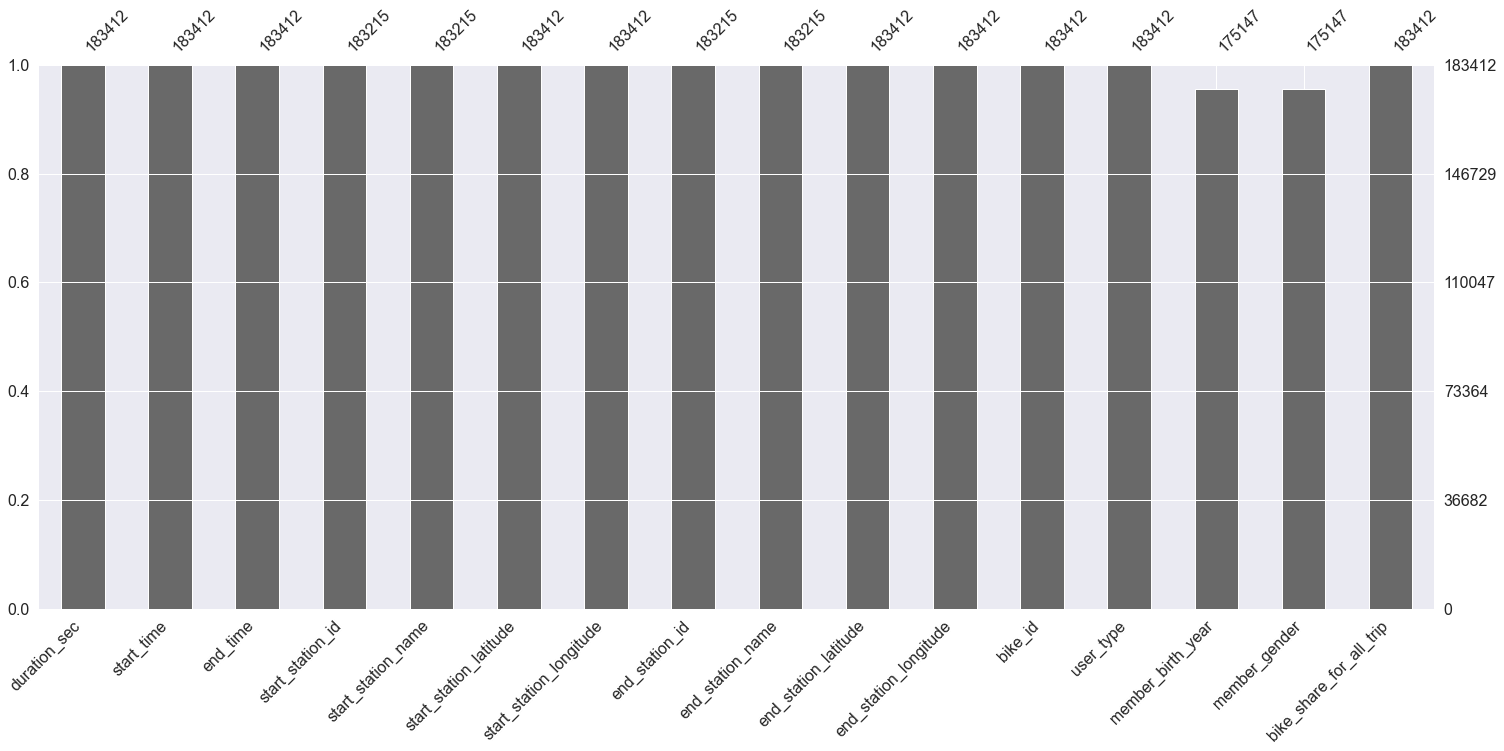

Number of Duplicates(df.duplicated().sum())
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000              

In [4]:
df = report('201902-fordgobike-tripdata.csv')

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


##### Fill Null Values

In [6]:
df.fillna(0,inplace=True)

#### Change datatypes of columns

In [7]:
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
df['start_station_id']=df['start_station_id'].astype(float)
df['start_station_id']=df['start_station_id'].astype(int)
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(float)
df['end_station_id']=df['end_station_id'].astype(int)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)
df['member_birth_year']=df['member_birth_year'].astype(int)
df['bike_share_for_all_trip']=(df['bike_share_for_all_trip']=='Yes').astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183412 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183412 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> 183412 rows and 16 feautes

### What is/are the main feature(s) of interest in your dataset?

> bike_share_for_all_trip 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec,bike_id,member_gender,member_birth_year and maybe all will help 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


# is Gender Feature Balanced or Imbalanced ,lets see that

In [9]:
df['member_gender'].replace(0,'Other',inplace=True)

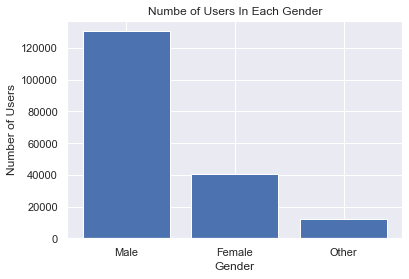

In [10]:
plt.bar(df['member_gender'].value_counts().index,df['member_gender'].value_counts().values)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.title('Numbe of Users In Each Gender')
plt.show()

The Visualization says Our Data isn't Balanced ,It will make bias in our dara and more our data is Male

# IS Label Balanced ,lets check it 

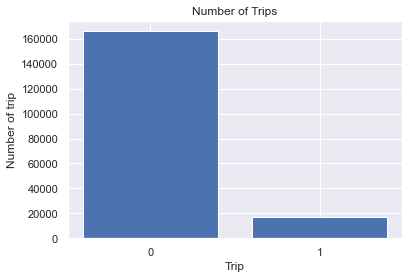

In [11]:
plt.bar(df['bike_share_for_all_trip'].value_counts().index,df['bike_share_for_all_trip'].value_counts().values)
plt.xticks([1,0])
plt.xlabel('Trip')
plt.ylabel('Number of trip')
plt.title('Number of Trips')
plt.show()

Label isn't Balanced more of trips isn't complete ,it will make bias on our model

# lets check disruption of Ages

In [12]:
# First lets delete age 0 
df['member_birth_year']=df['member_birth_year'].replace(0,df['member_birth_year'].median())

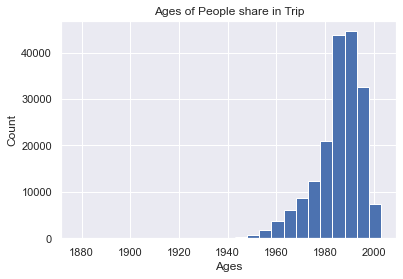

In [13]:
bins=np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+5,5)
plt.hist(df['member_birth_year'],bins=bins)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Ages of People share in Trip')
plt.show()

Most of Ages between 1980 to 1990

In [14]:
df['member_birth_year'].describe()

count    183412.000000
mean       1984.905284
std           9.896585
min        1878.000000
25%        1981.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

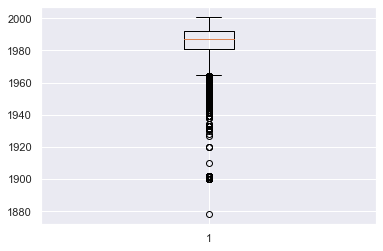

In [15]:
plt.boxplot(df['member_birth_year']);

There is immpossile ages and outliers in data lets drop them 

In [16]:
def IQR(Columns):
    Third=Columns.quantile(0.75)
    First=Columns.quantile(0.25)
    IQR=Third-First
    low=First-1.5*IQR
    high=Third+1.5*IQR
    return low ,high

In [17]:
low,high=IQR(df['member_birth_year'])

In [18]:
df=df[(df['member_birth_year']>=low)&(df['member_birth_year']<=high)]

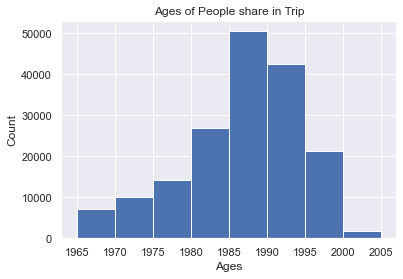

In [19]:
bins=np.arange(df['member_birth_year'].min(),df['member_birth_year'].max()+5,5)
plt.hist(df['member_birth_year'],bins=bins)
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Ages of People share in Trip')
plt.show()

most ages between 1980 to 1995

# lets check disruption of duration

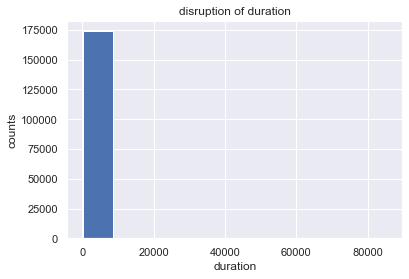

In [20]:
plt.hist(df['duration_sec'])
plt.xlabel('duration')
plt.ylabel('counts')
plt.title('disruption of duration')
plt.show()

our disruption is poitive skewed lets handle it 

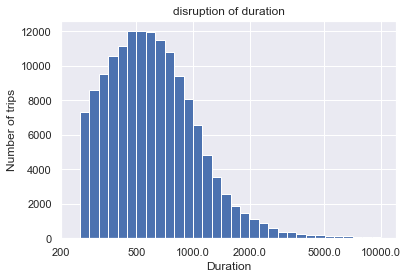

In [193]:
duration_filter = df.query('duration_sec <= 10000')
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(duration_filter['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data = duration_filter, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([200, 500, 1e3, 2e3, 5e3, 1e4] , [200, 500, 1e3, 2e3, 5e3, 1e4]  )
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.title('disruption of duration')
plt.show()

then our grahp is informative now

# lets check type of people share in trip

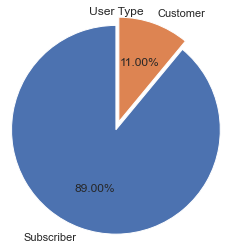

In [89]:
plt.pie(df['user_type'].value_counts(),startangle=90,labels=df['user_type'].value_counts().index,autopct='%.2f%%',radius=1.2,explode=(0, 0.1))
plt.title('User Type')
plt.show()

most of User is subscriber 

# lets check which hour has most number of trips

In [66]:
df['start_hour']=df['start_time'].apply(lambda x : x.hour)

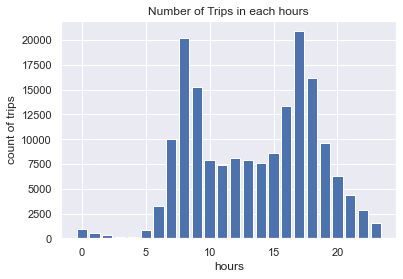

In [81]:
plt.bar(df['start_hour'].value_counts().index,df['start_hour'].value_counts().values)
plt.xlabel('hours')
plt.ylabel('count of trips')
plt.title('Number of Trips in each hours')
plt.show()

most trips between 7 to 10 and 15 to 19 

# which day of week has most trips

In [78]:
df['days']=df['start_time'].apply(lambda x : x.dayofweek)

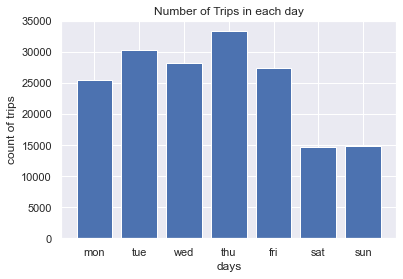

In [87]:
plt.bar(df['days'].value_counts().index,df['days'].value_counts().values)
plt.xlabel('days')
plt.ylabel('count of trips')
plt.title('Number of Trips in each day')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['mon','tue','wed','thu','fri','sat','sun'])
plt.show()

thursday has most number of trips

# which start state has most number of trip

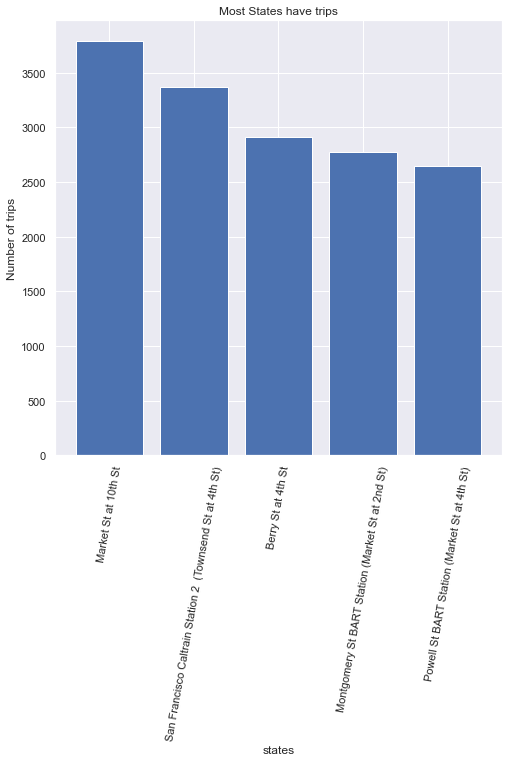

In [134]:
plt.figure(figsize=(8,8))
plt.bar(df['start_station_name'].value_counts().nlargest(5).index,df['start_station_name'].value_counts().nlargest(5).values)
plt.xticks(rotation=80)
plt.title('Most States have trips')
plt.xlabel('states')
plt.ylabel('Number of trips')
plt.show()

most of trips happen on Market St at 10th St



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> on age and duration columns there are immossible values like age 120 year and much high duration and i delete ourtliers on age column by using IQR there is more advanced techinques but i didn't use it cause it's required 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> duration column is positive skewed and i used log transformation to handle it 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# user type and duration

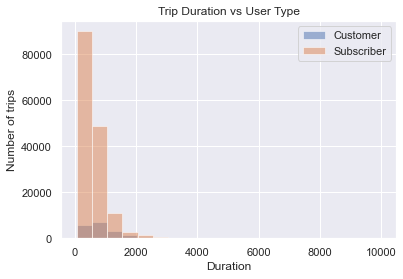

In [138]:
duration_filter = df.query('duration_sec < 10000')
duration_filter.query('user_type =="Customer"').duration_sec.hist(alpha=0.5, bins=20, label='Customer')
duration_filter.query('user_type =="Subscriber"').duration_sec.hist(alpha=0.5, bins=20, label='Subscriber')
plt.title('Trip Duration vs User Type')
plt.xlabel('Duration')
plt.ylabel('Number of trips')
plt.legend();

Subscriber is much higher than customer

# Gender vs bike_share_for_all_trip

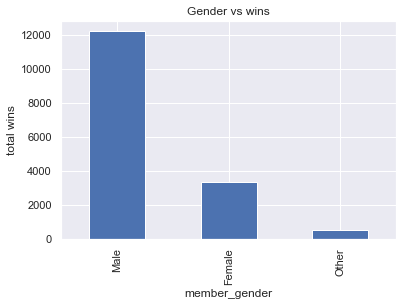

In [192]:
df[df['duration_sec']<=10000].groupby('member_gender')['bike_share_for_all_trip'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('total wins')
plt.title('Gender vs wins')
plt.show()

Male type has most number of completing trip

# which use type has highest avgerage duration

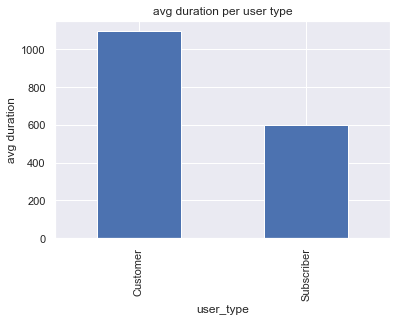

In [180]:
df[df['duration_sec']<=10000].groupby('user_type')['duration_sec'].mean().plot(kind='bar')
plt.ylabel('avg duration')
plt.title('avg duration per user type')
plt.show()

Customers have large avg duration than subscriber

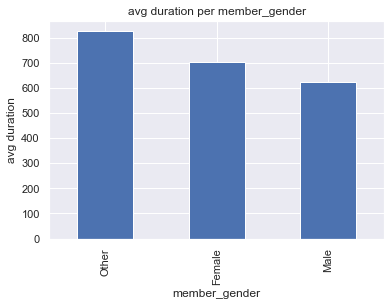

In [194]:
df[df['duration_sec']<=10000].groupby('member_gender')['duration_sec'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel('avg duration')
plt.title('avg duration per member_gender')

plt.show()

Other Gender has highest duration ( Maybe gay people or anything else !!! )

# day has highest avg duration

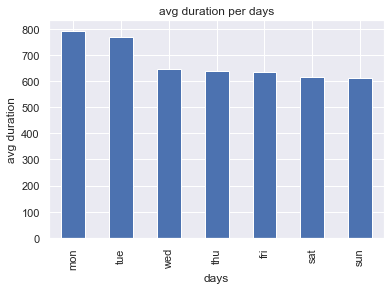

In [187]:
df[df['duration_sec']<=10000].groupby('days')['duration_sec'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel('avg duration')
plt.title('avg duration per days')
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['mon','tue','wed','thu','fri','sat','sun'])
plt.show()

Monday has most average duration

# hour has highest duration

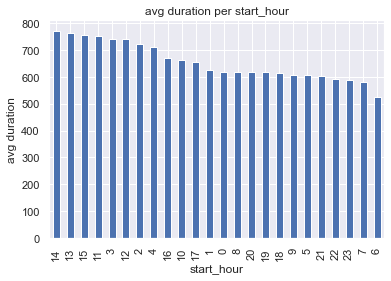

In [174]:
df[df['duration_sec']<=10000].groupby('start_hour')['duration_sec'].mean().sort_values(ascending = False).plot(kind='bar')
plt.ylabel('avg duration')
plt.title('avg duration per start_hour')
plt.show()

hour 14 start time of trip is most hour has highest avg duration

# Relation between days and duration 

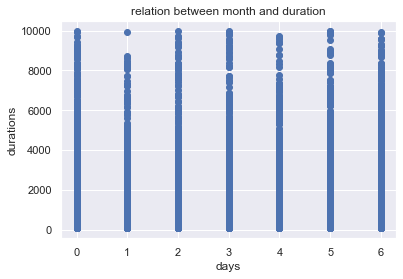

In [191]:
plt.scatter(df['days'][df['duration_sec']<=10000],df['duration_sec'][df['duration_sec']<=10000])
plt.title('relation between month and duration')
plt.xlabel('days')
plt.ylabel('durations')
plt.show()

there is no relation between them

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
when comparing days of week with average duration monday is highest day has average duration than other days
and hour 14 the same thing with other hours and customer is higher than subscriber and male finished high number of trips than other genders
and subscriber has highest number of trips diff

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

monday is weekend has highest average duration cause it weekend and midnight has most average duration cause most of people are free in this time rather than morning

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

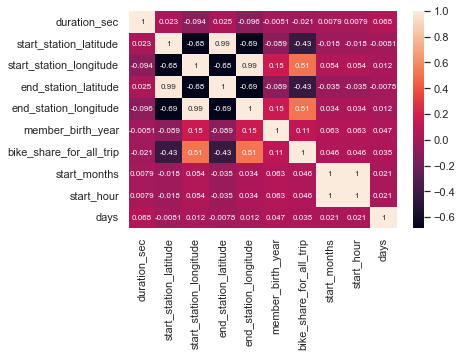

In [211]:
sb.heatmap(df[df['duration_sec']<=10000].corr(),annot=True,annot_kws={"size": 8})
plt.show()

there's no strong linear relations between features 

# Day of weeks per duration and type

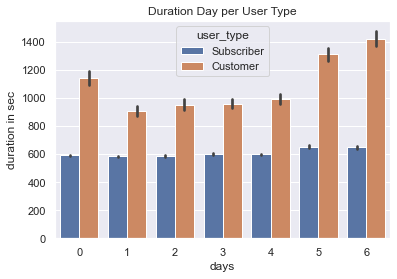

In [210]:
sb.barplot(data = df[df['duration_sec']<=10000], x = 'days', y = 'duration_sec', hue = 'user_type',) 
plt.ylabel('duration in sec')
plt.title('Duration Day per User Type')
plt.show()

Customer has highest duration ever over days

# Hours of Day per duration and type

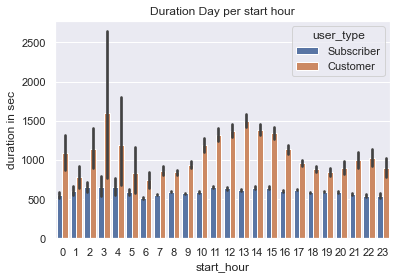

In [209]:
sb.barplot(data = df[df['duration_sec']<=10000], x = 'start_hour', y = 'duration_sec', hue = 'user_type',) 
plt.ylabel('duration in sec')
plt.title('Duration Day per start hour')
plt.show()

Customer has highest duration per all day of week

# Gender  per duration and type

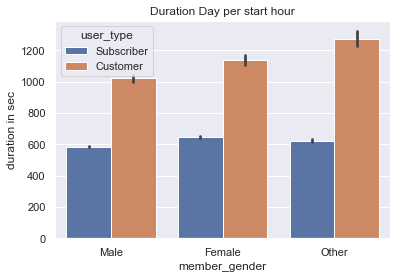

In [215]:
sb.barplot(data = df[df['duration_sec']<=10000], x = 'member_gender', y = 'duration_sec', hue = 'user_type',) 
plt.ylabel('duration in sec')
plt.title('Duration Day per start hour')
plt.show()

Customer is higher than subscriber

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> when i saw heatmap there's no linear relation between features and this's good for Machine learning model cause it will be multicolinearity and will no missleading result

### Were there any interesting or surprising interactions between features?

> Customers has highest duration and average duration than subscrible

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
Male is most gender founded on our data and most of trips hadn't finished most ages between 1965 to 1965 and i removed impossible ages like 1880 and many likes it by using IQR method and dist of duration has also outliers and i handle them using logarithm method 
most of Participants is subscrible but most of finished trips  finished by customers ,most of trip between 6 to 9 and 15 to 19 hour and thursday has most number of trip bu monday has highest average duration cause it is weekend
most of trips happend on Market St at 10th St state



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

